In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, neighbors

In [2]:
def time_to_minutes(time: str) -> int:
    hour, minutes = time.strip().split(':')
    
    if hour == '':
        hour = 0
    
    if minutes == '':
        minutes = 0

    return int(hour)*60 + int(minutes)

f = open('sleepdata.csv')
f.readline()

times = []
percentages = []

for line in f:
    if line != '\n':
        times.append(time_to_minutes(line.strip().split(';')[3]))
        percentages.append(int(line.strip().split(';')[2][:-1]))

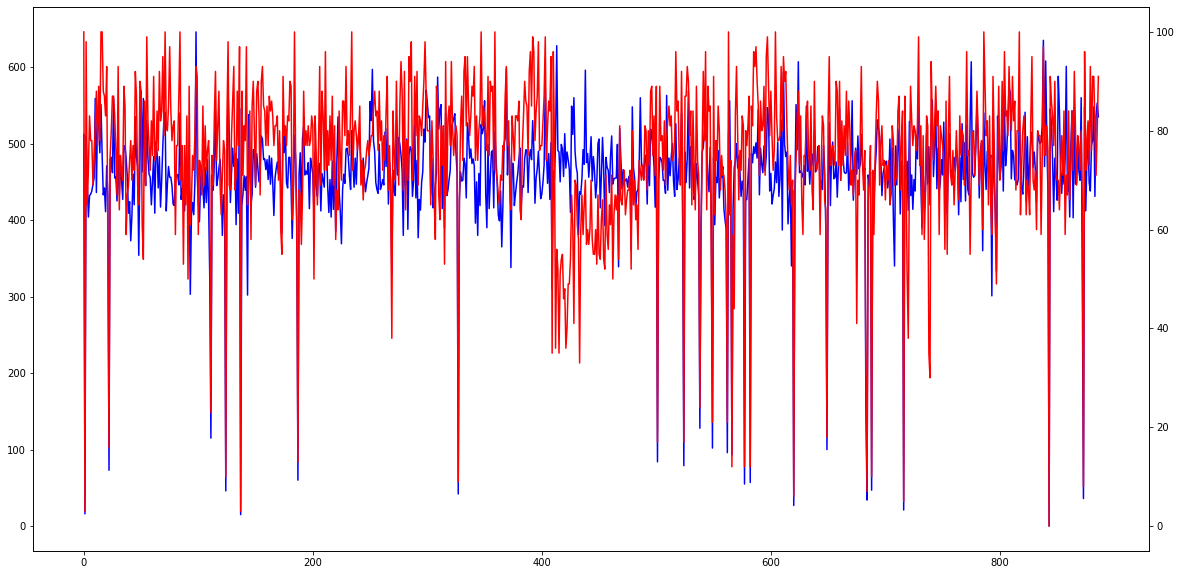

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax2 = ax.twinx()
ax.plot(times, color="blue")
ax2.plot(percentages, color="red")

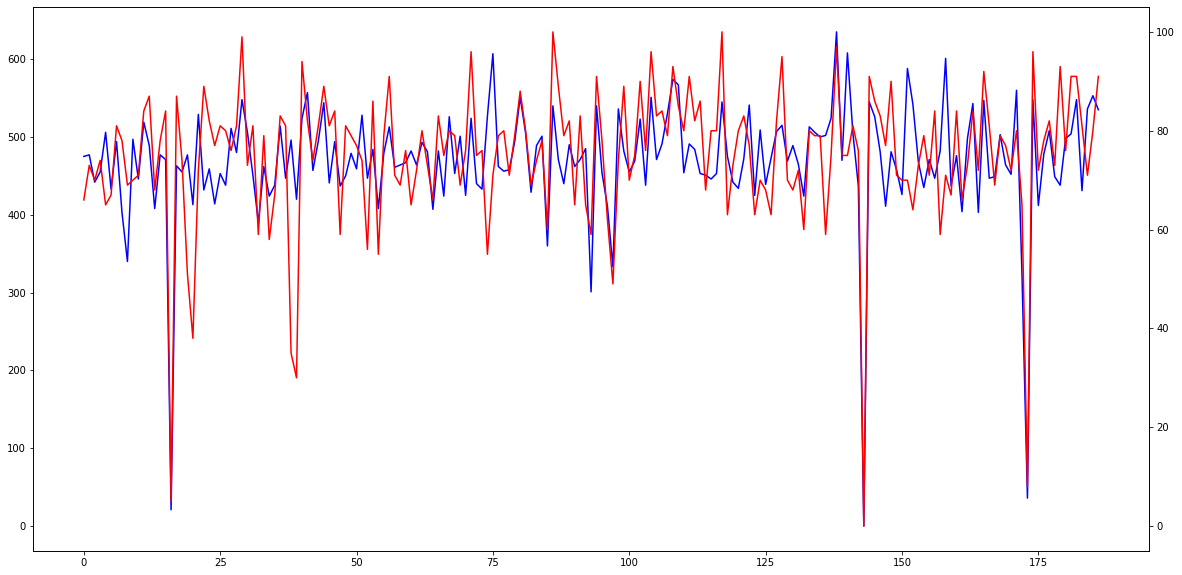

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax2 = ax.twinx()
ax.plot(times[700:], color="blue")
ax2.plot(percentages[700:], color="red")

In [5]:
quality_to_time = {}
for i in range(len(times)):
    if percentages[i] not in quality_to_time.keys():
        quality_to_time.update({percentages[i]:[]})
    else:
        quality_to_time[percentages[i]].append(times[i])
        
quality_averages = {key: sum(values)/len(values) if len(values) > 0 else 0 for key, values in quality_to_time.items()}

print(quality_averages)

{100: 521.5, 3: 15.0, 98: 513.5, 65: 428.57894736842104, 72: 460.37931034482756, 83: 467.0263157894737, 78: 455.96, 69: 450.48, 74: 460.78125, 81: 469.1707317073171, 88: 489.5, 77: 456.34285714285716, 89: 481.47058823529414, 87: 484.0, 93: 511.0, 58: 417.8333333333333, 16: 0, 75: 464.46666666666664, 80: 479.73333333333335, 76: 457.1818181818182, 67: 465.10526315789474, 64: 460.8, 70: 454.25925925925924, 85: 489.14285714285717, 59: 434.2142857142857, 92: 503.0, 90: 503.1666666666667, 61: 440.0, 54: 422.8333333333333, 86: 484.6875, 99: 550.0, 82: 466.4782608695652, 91: 514.5384615384615, 84: 466.2173913043478, 95: 513.375, 79: 476.1388888888889, 97: 534.75, 53: 419.5, 50: 427.5, 66: 458.6923076923077, 73: 452.17391304347825, 23: 0, 63: 461.2857142857143, 71: 468.9, 10: 47.0, 68: 446.6111111111111, 60: 435.5, 55: 480.1666666666667, 62: 439.3333333333333, 13: 0, 57: 442.6666666666667, 96: 511.44444444444446, 38: 413.0, 94: 528.3333333333334, 9: 0, 35: 492.5, 36: 468.0, 56: 450.666666666666

In [6]:
average_percentages = []
for i in range(101):
    if i in quality_averages:
        average_percentages.append(quality_averages[i])

print(average_percentages)

[0, 15.0, 0, 0, 0, 0, 0, 47.0, 56.0, 0, 0, 79.0, 0, 96.0, 0, 0, 0, 0, 0, 492.5, 468.0, 413.0, 0, 460.0, 0, 0, 0, 400.0, 427.5, 477.0, 377.0, 419.5, 422.8333333333333, 480.1666666666667, 450.6666666666667, 442.6666666666667, 417.8333333333333, 434.2142857142857, 435.5, 440.0, 439.3333333333333, 461.2857142857143, 460.8, 428.57894736842104, 458.6923076923077, 465.10526315789474, 446.6111111111111, 450.48, 454.25925925925924, 468.9, 460.37931034482756, 452.17391304347825, 460.78125, 464.46666666666664, 457.1818181818182, 456.34285714285716, 455.96, 476.1388888888889, 479.73333333333335, 469.1707317073171, 466.4782608695652, 467.0263157894737, 466.2173913043478, 489.14285714285717, 484.6875, 484.0, 489.5, 481.47058823529414, 503.1666666666667, 514.5384615384615, 503.0, 511.0, 528.3333333333334, 513.375, 511.44444444444446, 534.75, 513.5, 550.0, 521.5]


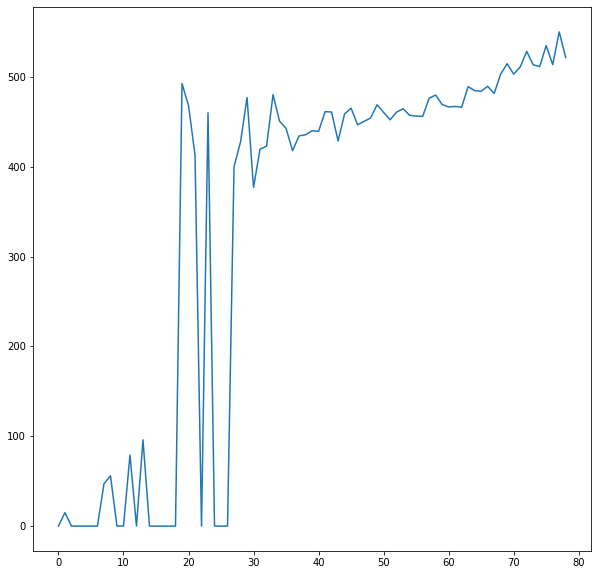

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(average_percentages)

In [8]:
new_times = np.array(times).reshape(-1,1)
new_svm = svm.SVC()
new_svm.fit(new_times, percentages)

SVC()

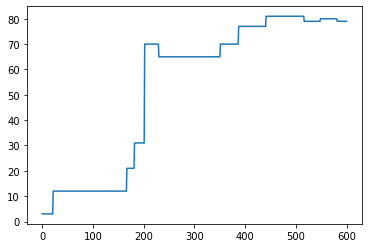

In [9]:
X = np.array([i for i in range(600)])
y = new_svm.predict(X.reshape(-1,1))
plt.plot(X,y)

In [10]:
temp1 = new_times[:-1]
temp2 = [time for time in new_times[1:]]
temp_times = np.array([np.array([temp2[i][0], temp2[i][0]-temp1[i][0]*0.05]) for i in range(len(temp1))])

In [11]:
print(temp_times[0])

[16.  -9.6]


In [12]:
new_svm2 = svm.SVC()
new_svm2.fit(temp_times, percentages[1:])

SVC()

In [13]:
new_svm2.predict([[300,300]])

array([65])

In [14]:
grids = []
y_grids = []

for i in range(1,601):
    y_grids.append([new_svm2.predict([[i,j]]) for j in range(1,601)])

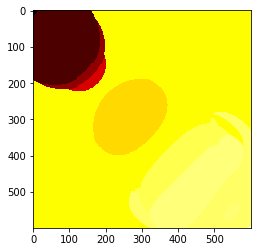

In [15]:
plt.imshow(y_grids, cmap="hot", interpolation='nearest')
plt.show()

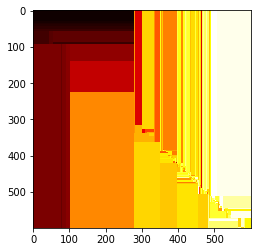

In [16]:
from sklearn import tree
new_tree = tree.DecisionTreeClassifier()
new_tree.fit(temp_times, percentages[1:])
y_grids = []

for i in range(1,601):
    y_grids.append([new_tree.predict([[i,j]]) for j in range(1,601)])
    
plt.imshow(y_grids, cmap="hot", interpolation='nearest')
plt.show()

In [17]:
from sklearn.tree import export_test
print(tree_rules = export_text(new_tree, feature_names=list(X_train)))

ImportError: cannot import name 'export_test' from 'sklearn.tree' (C:\Users\2maya\OneDrive\Desktop\Classes\CS125\stuff\virtual125\lib\site-packages\sklearn\tree\__init__.py)

In [29]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, '[' + ",".join([str(i) for i in tree_.value[node][0]]) + ']'))

    recurse(0, 1)
    
print(tree_to_code(new_tree, ['yesterday', 'today']))

def tree(yesterday, today):
  if today <= 455.1750030517578:
    if today <= 350.125:
      if today <= 277.9499969482422:
        if today <= -6.075000166893005:
          if today <= -17.075000286102295:
            return [1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
          else:  # if today > -17.075000286102295
            return [0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
        else:  # if today > -6.075000166893005
          if yesterday 

                return [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
              else:  # if today > 528.1000061035156
                if today <= 531.6749877929688:
                  if yesterday <= 555.5:
                    return [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
                  else:  # if yesterday > 555.5
                    if yesterday <= 556.5:
                      if today <= 530.25:
                        return [0.0,0.0,0

In [32]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):

	'''
	Outputs a decision tree model as a Python function
	
	Parameters:
	-----------
	tree: decision tree model
		The decision tree to represent as a function
	feature_names: list
		The feature names of the dataset used for building the decision tree
	'''

	tree_ = tree.tree_
	feature_name = [
		feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
		for i in tree_.feature
	]
	print("def tree({}):".format(", ".join(feature_names)))

	def recurse(node, depth):
		indent = "  " * depth
		if tree_.feature[node] != _tree.TREE_UNDEFINED:
			name = feature_name[node]
			threshold = tree_.threshold[node]
			print("{}if {} <= {}:".format(indent, name, threshold))
			recurse(tree_.children_left[node], depth + 1)
			print("{}else:  # if {} > {}".format(indent, name, threshold))
			recurse(tree_.children_right[node], depth + 1)
		else:
			print("{}return {}".format(indent, tree_.value[node]))

	recurse(0, 1)
    
tree_to_code(new_tree, ['yesterday', 'today'])

def tree(yesterday, today):
  if today <= 455.1750030517578:
    if today <= 350.125:
      if today <= 277.9499969482422:
        if today <= -6.075000166893005:
          if today <= -17.075000286102295:
            return [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.]]
          else:  # if today > -17.075000286102295
            return [[0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.]]
        else:  # if today > -6.075000166893005
          if yesterday <= 51.0:
            if yesterday <= 44.0:
              if today <= 1.2500001192092896:
                return [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0

  0. 0. 0. 0. 0. 0. 0.]]
                                else:  # if today > 430.5
                                  if today <= 430.7250061035156:
                                    return [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.]]
                                  else:  # if today > 430.7250061035156
                                    if today <= 430.875:
                                      return [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.]]
                                    else:  # if today > 430.875
                                      return [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

  0. 0. 1. 0. 0. 0. 0.]]
                            else:  # if today > 466.6000061035156
                              return [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.]]
                        else:  # if today > 467.9499969482422
                          if yesterday <= 492.5:
                            return [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.]]
                          else:  # if yesterday > 492.5
                            return [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

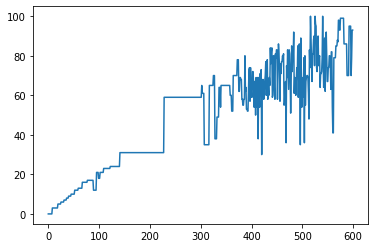

In [18]:
new_tree2 = tree.DecisionTreeClassifier()
new_tree2.fit(new_times, percentages)

X_t = np.array([i for i in range(600)])
y_t = new_tree2.predict(X_t.reshape(-1,1))
plt.plot(X_t,y_t)

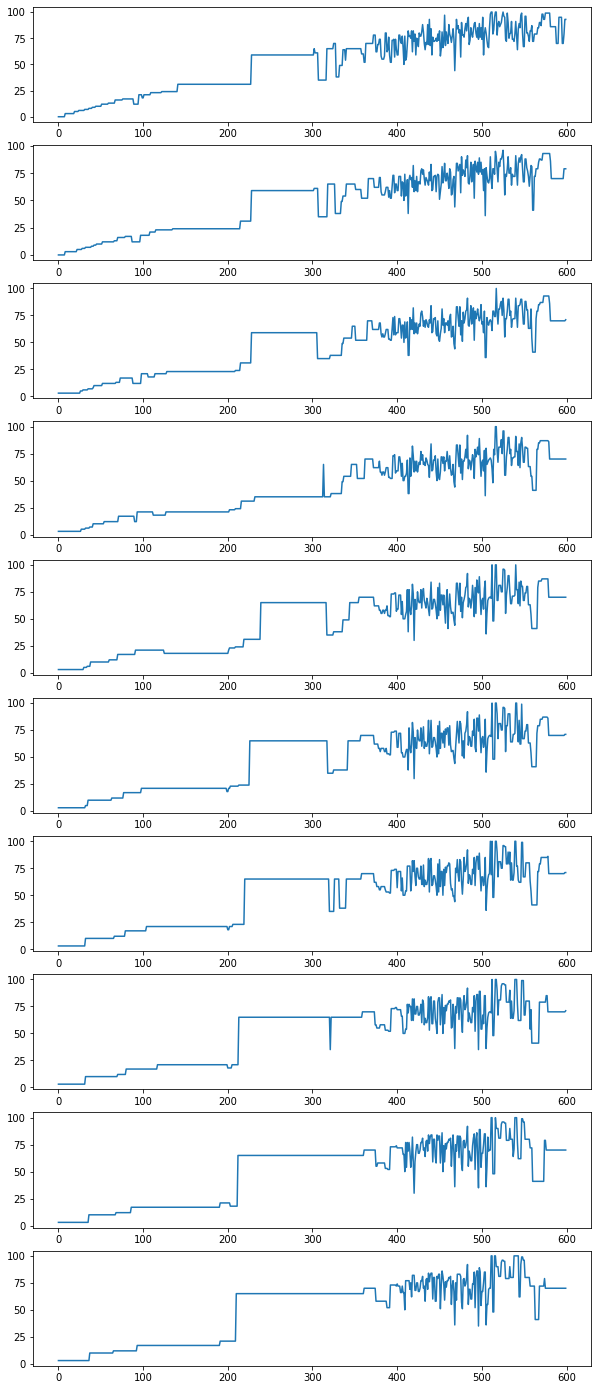

In [19]:
fig, axes = plt.subplots(10, 1, figsize=(10,25))
for i in range(1,11):
    new_knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    new_knn.fit(np.array(times).reshape(-1,1), percentages)
    X = np.array([i for i in range(600)])
    y = new_knn.predict(X.reshape(-1,1))
    axes[i-1].plot(X, y)

In [20]:
from joblib import dump
dump(new_tree, 'DT_CLF.joblib')

['DT_CLF.joblib']